In [1]:
from load_data import load_data

path='Files/'

runname,lon_arr,lat_arr,oom,surfp,p_BAR,data_26,data_lo=load_data(path)

Run Name?:EARTH_T42
Pressure OOM?:0
Surface Press [bar]:1.0
 
--------------------------
|    ARRAY DIMENSIONS    |
--------------------------
N_levels:  30
N_lons:    128
N_lats:    64
N_params:  6
 
PRESSURE ARRAY: 
[0.03225806 0.06451613 0.09677419 0.12903226 0.16129032 0.19354839
 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871 0.38709677
 0.41935484 0.4516129  0.48387097 0.51612903 0.5483871  0.58064516
 0.61290323 0.64516129 0.67741935 0.70967742 0.74193548 0.77419355
 0.80645161 0.83870968 0.87096774 0.90322581 0.93548387 0.96774194]
 
LATITUDE ARRAY: 
[ 87.864   85.097   82.313   79.526   76.737   73.948   71.158   68.368
  65.578   62.787   59.997   57.207   54.416   51.626   48.835   46.045
  43.254   40.464   37.673   34.883   32.092   29.301   26.511   23.72
  20.93    18.139   15.348   12.558    9.7671   6.9765   4.1859   1.3953
  -1.3953  -4.1859  -6.9765  -9.7671 -12.558  -15.348  -18.139  -20.93
 -23.72   -26.511  -29.301  -32.092  -34.883  -37.673  -40.464  -43.

# ----------------------------------
#  Temperature Contour Plots 

-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  249.43 249.0
Max Temp [K], Plot limit:  300.26 301.0
-------------------------------------------------------


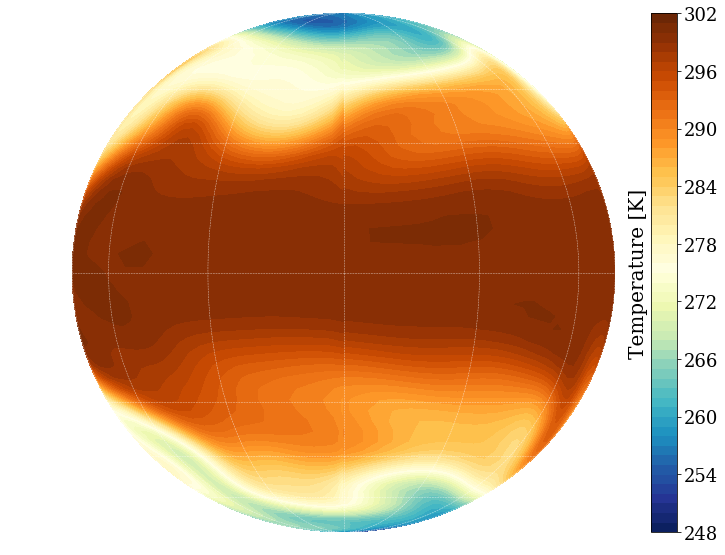

-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min UWind [m/s], Plot limit:  -20.889 -33.0
Max UWind [m/s], Plot limit:  32.554 33.0
-------------------------------------------------------


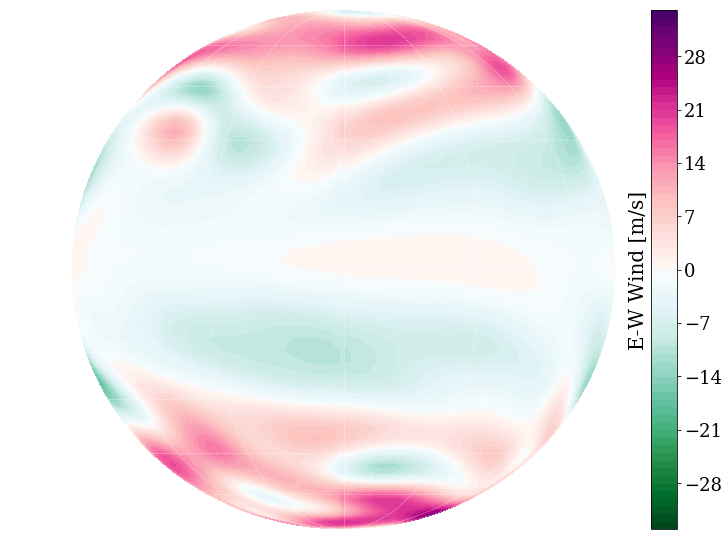

-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min VWind [m/s], Plot limit:  -23.844 -33.0
Max VWind [m/s], Plot limit:  32.459 33.0
-------------------------------------------------------


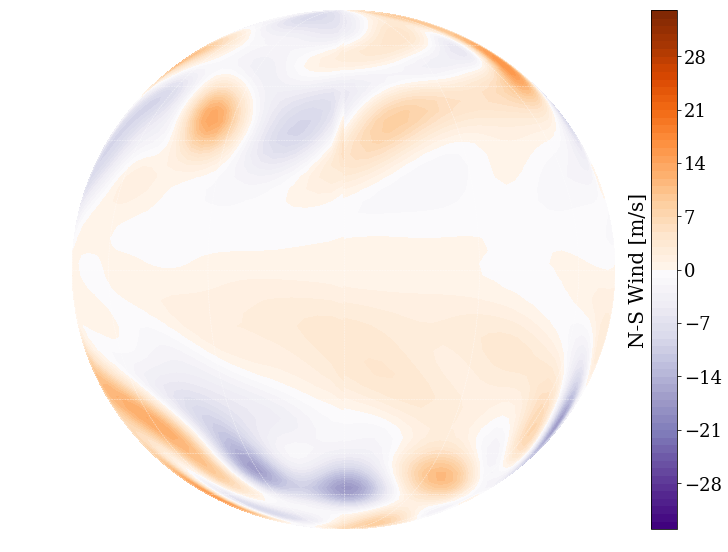

-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------


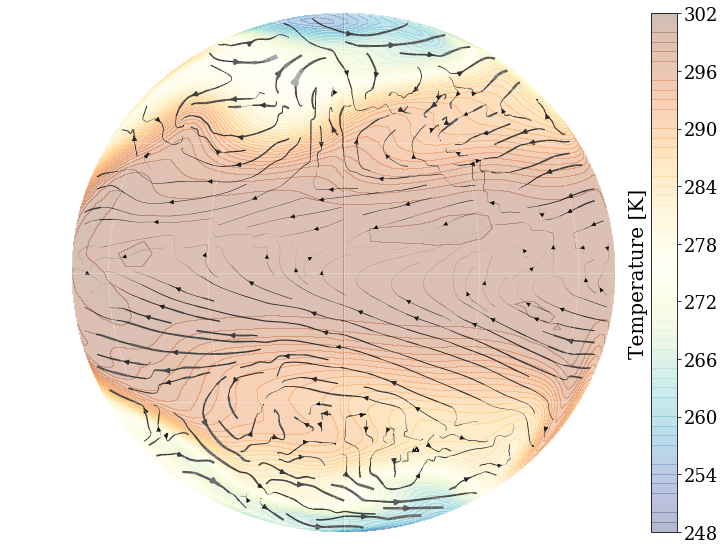

In [2]:
from igcm_Plot import igcm_Plot

lev=29

plot=0              #0=temp, 1=U wind, 2=V wind, 3=streamplot

vfrac=1.5           #for streamplot only

units_a=1           #1=degrees, 0=radians, lat lon units. INPUT is already in degrees
units_t=0           #0=Kelvin, 1=Celsius, 2=Farhenheit - FOR plot=0 only
units_w=0           #0=m/s 1=km/s 2=mph, FOR plot=1 or =2 only

ortho=True         #orthographic projection
latcenter=0.0       #center of plot in degrees, ONLY WORKS FOR ORTHO=True
loncenter=0.0 

savefig=False
savename=path+runname+'/TEMPS'+str(int(lev))+'_ortho.pdf'

ver=True           #verbose output, PLOTS AND TEXT

cbarL=0.0 #useful for multiple plots --- force lower limit of colorbars. SET 0 otherwise
cbarM=0.0 #useful for multiple plots --- force upper limit of colorbars
ex=1           # if you want to extend the colorbar. Default is 1 for temperature
cbar_even=True #for Winds, center colorbar so that 0 is middle.
ncolors=0  #0,sets so that each color step =1 in whatever units. otherwise =multiple of that

%matplotlib inline
igcm_Plot(plot,lon_arr,lat_arr,p_BAR,data_26,lev,latcenter,loncenter,ex,units_a,units_t,units_w,
          savefig,savename,ortho,ver,cbarL,cbarM,cbar_even,ncolors,vfrac)

plot=1
igcm_Plot(plot,lon_arr,lat_arr,p_BAR,data_26,lev,latcenter,loncenter,ex,units_a,units_t,units_w,
          savefig,savename,ortho,ver,cbarL,cbarM,cbar_even,ncolors,vfrac)

plot=2
igcm_Plot(plot,lon_arr,lat_arr,p_BAR,data_26,lev,latcenter,loncenter,ex,units_a,units_t,units_w,
          savefig,savename,ortho,ver,cbarL,cbarM,cbar_even,ncolors,vfrac)

plot=3
igcm_Plot(plot,lon_arr,lat_arr,p_BAR,data_26,lev,latcenter,loncenter,ex,units_a,units_t,units_w,
          savefig,savename,ortho,ver,cbarL,cbarM,cbar_even,ncolors,vfrac)


In [2]:
## Maybe you want a movie showing the last orbit....
import numpy as np
import imageio
import os
from Temp_Plot import Temp_Plot


lev=29
temp_ex=1
units_a=1           #1=degrees, 0=radians
units_t=0           #0=Kelvin, 1=Celsius, 2=Farhenheit
latcenter=0.0       #center of plot in degrees, ONLY WORKS FOR ORTHO
loncenter=0.0 
savefig=True
#savename=path+runname+'/TEMPS'+str(int(lev))+'_ortho.pdf'
ortho=False
ver=True
cbarL=np.nanmin(data_lo[lev,:,:,0,:]) #useful for multiple plots --- hold cbar the same for all
cbarM=np.nanmax(data_lo[lev,:,:,0,:]) #useful for multiple plots --- hold cbar the same for all

savepath=path+runname+'/LastOrb_F/'

nouts=data_lo.shape[-1]
for t in range(0,nouts):
    savename=savepath+str.zfill(str(int(t)),4)+'.png'
    Temp_Plot(lon_arr,lat_arr,p_BAR,data_lo[lev,:,:,0,t],lev,latcenter,loncenter,temp_ex,units_a,units_t,savefig,savename,ortho,ver,cbarL,cbarM)
    
file_names = sorted((fn for fn in os.listdir(savepath)if fn.endswith('.png')))
images=[]
for filename in file_names:
    images.append(imageio.imread(savepath+filename))
imageio.mimsave(savepath+'lastorb.gif',images,duration=0.35)

-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  253.77 246.4
Max Temp [K], Plot limit:  300.65 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  253.61 246.4
Max Temp [K], Plot limit:  300.76 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  253.41 246.4
Max Temp [K], Plot limit:  300.53 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  252.54 246.4
Max Temp [K], Plot limit:  300.61 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  252.69 246.4
Max Temp [K], Plot limit:  300.57 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  251.32 246.4
Max Temp [K], Plot limit:  300.61 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  252.73 246.4
Max Temp [K], Plot limit:  300.67 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  252.1 246.4
Max Temp [K], Plot limit:  300.6 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  249.67 246.4
Max Temp [K], Plot limit:  300.84 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  250.22 246.4
Max Temp [K], Plot limit:  300.5 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  252.31 246.4
Max Temp [K], Plot limit:  300.32 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  253.02 246.4
Max Temp [K], Plot limit:  300.41 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  251.04 246.4
Max Temp [K], Plot limit:  300.5 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  248.62 246.4
Max Temp [K], Plot limit:  300.44 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  252.2 246.4
Max Temp [K], Plot limit:  300.66 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  249.24 246.4
Max Temp [K], Plot limit:  300.46 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  251.39 246.4
Max Temp [K], Plot limit:  300.55 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  249.51 246.4
Max Temp [K], Plot limit:  300.61 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  249.35 246.4
Max Temp [K], Plot limit:  300.42 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  249.89 246.4
Max Temp [K], Plot limit:  300.46 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  252.58 246.4
Max Temp [K], Plot limit:  300.38 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  249.28 246.4
Max Temp [K], Plot limit:  300.38 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  249.22 246.4
Max Temp [K], Plot limit:  300.33 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  247.39 246.4
Max Temp [K], Plot limit:  300.36 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  250.79 246.4
Max Temp [K], Plot limit:  300.47 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  247.14 246.4
Max Temp [K], Plot limit:  300.5 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  246.44 246.4
Max Temp [K], Plot limit:  300.45 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  247.71 246.4
Max Temp [K], Plot limit:  300.46 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  250.46 246.4
Max Temp [K], Plot limit:  300.68 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  250.37 246.4
Max Temp [K], Plot limit:  300.64 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  248.84 246.4
Max Temp [K], Plot limit:  300.6 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  247.81 246.4
Max Temp [K], Plot limit:  300.36 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  252.5 246.4
Max Temp [K], Plot limit:  300.27 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  250.36 246.4
Max Temp [K], Plot limit:  300.48 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  248.23 246.4
Max Temp [K], Plot limit:  300.59 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  248.61 246.4
Max Temp [K], Plot limit:  300.69 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  247.37 246.4
Max Temp [K], Plot limit:  300.57 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  250.13 246.4
Max Temp [K], Plot limit:  300.56 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  250.5 246.4
Max Temp [K], Plot limit:  300.63 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  252.19 246.4
Max Temp [K], Plot limit:  300.76 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  249.6 246.4
Max Temp [K], Plot limit:  300.48 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  248.23 246.4
Max Temp [K], Plot limit:  300.64 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  251.76 246.4
Max Temp [K], Plot limit:  300.71 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  250.68 246.4
Max Temp [K], Plot limit:  300.75 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  248.49 246.4
Max Temp [K], Plot limit:  300.69 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  251.23 246.4
Max Temp [K], Plot limit:  300.47 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  249.43 246.4
Max Temp [K], Plot limit:  300.4 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  248.46 246.4
Max Temp [K], Plot limit:  300.54 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  249.69 246.4
Max Temp [K], Plot limit:  300.63 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  250.81 246.4
Max Temp [K], Plot limit:  300.42 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  251.21 246.4
Max Temp [K], Plot limit:  300.42 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  252.38 246.4
Max Temp [K], Plot limit:  300.39 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  251.4 246.4
Max Temp [K], Plot limit:  300.36 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  250.7 246.4
Max Temp [K], Plot limit:  300.46 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  251.35 246.4
Max Temp [K], Plot limit:  300.43 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  250.78 246.4
Max Temp [K], Plot limit:  300.5 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  250.26 246.4
Max Temp [K], Plot limit:  300.55 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  247.65 246.4
Max Temp [K], Plot limit:  300.28 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  248.74 246.4
Max Temp [K], Plot limit:  300.12 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  248.02 246.4
Max Temp [K], Plot limit:  300.17 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  247.48 246.4
Max Temp [K], Plot limit:  300.38 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  246.84 246.4
Max Temp [K], Plot limit:  300.39 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  246.4 246.4
Max Temp [K], Plot limit:  300.56 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  247.35 246.4
Max Temp [K], Plot limit:  300.78 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  248.12 246.4
Max Temp [K], Plot limit:  300.77 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  251.78 246.4
Max Temp [K], Plot limit:  300.79 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  251.48 246.4
Max Temp [K], Plot limit:  300.56 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  252.34 246.4
Max Temp [K], Plot limit:  300.48 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  253.38 246.4
Max Temp [K], Plot limit:  300.63 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  255.0 246.4
Max Temp [K], Plot limit:  300.39 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  253.48 246.4
Max Temp [K], Plot limit:  300.44 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  254.91 246.4
Max Temp [K], Plot limit:  300.41 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  256.12 246.4
Max Temp [K], Plot limit:  300.41 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  252.87 246.4
Max Temp [K], Plot limit:  300.35 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  253.4 246.4
Max Temp [K], Plot limit:  300.41 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  254.85 246.4
Max Temp [K], Plot limit:  300.52 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  253.44 246.4
Max Temp [K], Plot limit:  300.54 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  252.32 246.4
Max Temp [K], Plot limit:  300.46 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  250.6 246.4
Max Temp [K], Plot limit:  300.63 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  254.71 246.4
Max Temp [K], Plot limit:  300.49 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  253.25 246.4
Max Temp [K], Plot limit:  300.54 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  250.81 246.4
Max Temp [K], Plot limit:  300.67 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  250.48 246.4
Max Temp [K], Plot limit:  300.79 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  249.75 246.4
Max Temp [K], Plot limit:  300.97 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  251.54 246.4
Max Temp [K], Plot limit:  300.73 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  251.36 246.4
Max Temp [K], Plot limit:  300.73 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  249.74 246.4
Max Temp [K], Plot limit:  301.25 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  249.42 246.4
Max Temp [K], Plot limit:  300.38 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  247.82 246.4
Max Temp [K], Plot limit:  300.39 301.25
-------------------------------------------------------


-------------------------------------------------------
  Plotting Atmosphere Level:  29 -> Pressure= 0.9677
-------------------------------------------------------
Min Temp [K], Plot limit:  253.61 246.4
Max Temp [K], Plot limit:  300.3 301.25
-------------------------------------------------------


In [3]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy.ma as ma
from numpy.random import uniform, seed
# make up some randomly distributed data
seed(1234)
npts = 200
x = uniform(-2,2,npts)
y = uniform(-2,2,npts)
z = x*np.exp(-x**2-y**2)

In [4]:
print x.shape
print y.shape
print z.shape

(200,)
(200,)
(200,)
